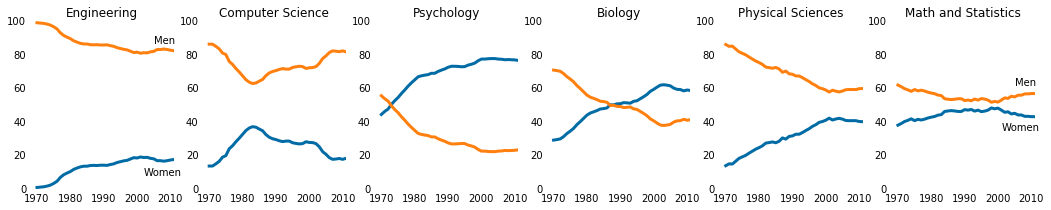

In [3]:
# import block
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# read csv file
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

# create rgb colors (color blinded pallette 10)
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

# category list
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

# create figure
fig = plt.figure(figsize=(18, 3))

# create subplots
for num, cat in enumerate(stem_cats, start=1):
    ax = fig.add_subplot(1,6,num)
    ax.plot(women_degrees['Year'], women_degrees[cat], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[cat], c=cb_orange, label='Men', linewidth=3)
    # change all params to false
    for key, spine in ax.spines.items():
        spine.set_visible(False) 
    # set limits for axies
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(cat)
    # turn off the ticks visibility
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    # add the legend only to leftmost and rightmost charts
    if num == 1:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif num == 6:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        
plt.show()

# Comparing across all degree categories

In [4]:
# category lists

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

In [9]:
def add_plot(pos, cat, index):
    ax = fig.add_subplot(6,3,pos+1)
    year, cat_val = women_degrees['Year'], women_degrees[cat]
    ax.plot(year, cat_val, c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(year, 100-cat_val, c=cb_orange, label='Men', linewidth=3)
    # change all params to false
    for key, spine in ax.spines.items():
        spine.set_visible(False) 
    # set limits for axies
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(cat)
    # turn off the ticks and x-axis labels visibility
    ax.tick_params(bottom="off", top="off", 
                   left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    # add horisontal line 50-50 gender breakdown
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    # add the legend only to leftmost and rightmost charts
    if index == 0:
        w_pos = women_degrees[
            women_degrees['Year'] == 2003][cat].values[0] + 4
        m_pos = 98 - w_pos
        ax.text(2005, m_pos, 'Men')
        ax.text(2003, w_pos, 'Women')
    elif index == 5:
        w_pos = women_degrees[
            women_degrees['Year'] == 2003][cat].values[0] - 10
        m_pos = 95 - w_pos
        ax.text(2005, m_pos, 'Men')
        ax.text(2003, w_pos, 'Women')
        ax.tick_params(labelbottom='on')


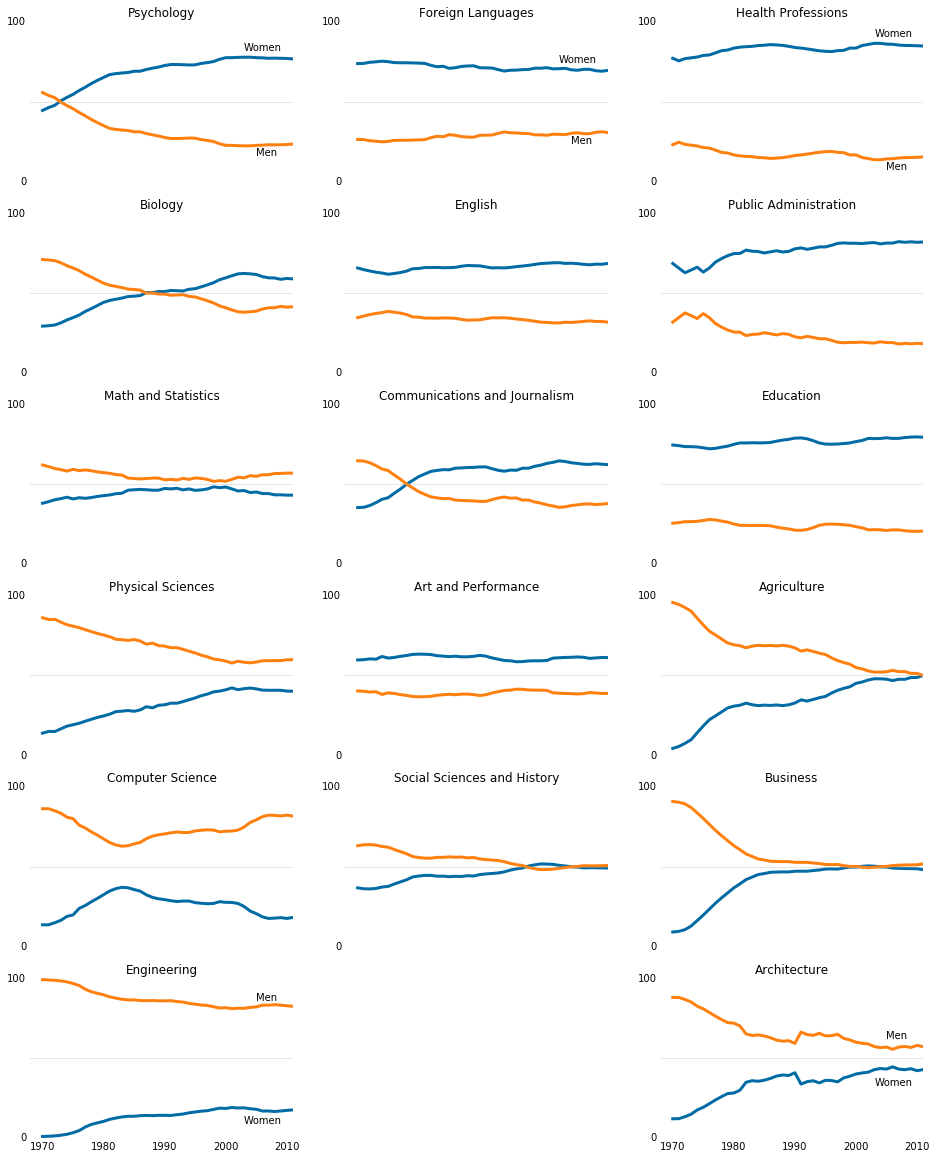

In [11]:
fig = plt.figure(figsize=(16, 20))

plt.savefig('gender_degrees.png')

for i in range(0, 18, 3):
    cat_index = int(i/3)
    cat = stem_cats[cat_index]
    add_plot(i, cat, cat_index)

for i in range(1, 16, 3):
    cat_index = int((i-1)/3)
    cat = lib_arts_cats[cat_index]
    add_plot(i, cat, cat_index)

for i in range(2, 20, 3):
    cat_index = int((i-2)/3)
    cat = other_cats[cat_index]
    add_plot(i, cat, cat_index)

plt.show()